<a href="https://colab.research.google.com/github/dharmendra-chouhan/-DEAS-Accounts---Municipal-Corporation/blob/master/TimeSheet_01_06_2020_to_13_06_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title  {display-mode: "form"}
import pandas as pd

import Data bugzilla

In [3]:
#@title  {display-mode: "form"}
from google.colab import files
uploaded = files.upload()

Saving bugs-2020-06-15.csv to bugs-2020-06-15.csv


In [0]:
#@title  {display-mode: "form"}
bugzilla_1junto13jun= pd.read_csv('bugs-2020-06-15.csv', encoding='latin-1')

import Data clockify

In [5]:
#@title  {display-mode: "form"}
from google.colab import files
uploaded = files.upload()

Saving Clockify_Detailed_Report_06_01_2020-06_13_2020.csv to Clockify_Detailed_Report_06_01_2020-06_13_2020.csv


In [0]:
#@title  {display-mode: "form"}
clockify_1junto13jun= pd.read_csv('Clockify_Detailed_Report_06_01_2020-06_13_2020.csv', encoding='latin-1')

**Clockify and Bugzilla Merging Data**

In [7]:
#@title  {display-mode: "form"}
scriteria = bugzilla_1junto13jun['Bug ID'].values.tolist()  
df=pd.DataFrame(clockify_1junto13jun)
clockifybugs = df[0:0]
clockify_1junto13jun['Bug ID'] =0
for x in scriteria:
  df=pd.DataFrame(clockify_1junto13jun[clockify_1junto13jun['Description'].str.upper().str.contains(str(x))])
  df['Bug ID'] =x
  clockifybugs=clockifybugs.append(df)
clockifybugs = pd.merge(clockifybugs, bugzilla_1junto13jun, on='Bug ID')
clockifybugsmer=clockifybugs[['Bug ID','Product', 'User','Assignee','Description','Summary','Orig. Est.','Duration (decimal)','Status','Resolution','Actual Hours','Start Date_x','End Date']] 
clockifybugsmer.head(100)


,Bug ID,Product,User,Assignee,Description,Summary,Orig. Est.,Duration (decimal),Status,Resolution,Actual Hours,Start Date_x,End Date
0,34805.0,KCCA,Dharmendra Chouhan,afak.pangarkar@gmail.com,updated script for data correction :-Bug 34805...,Datacorrection of Module id in Location map ta...,4.0,2.11,RESOLVED,FIXED ON DEVELOPMENT,3.0,06/06/2020,06/06/2020
1,34805.0,KCCA,Afak Pangarkar,afak.pangarkar@gmail.com,Discussion with Dharmendra for defect id 34805...,Datacorrection of Module id in Location map ta...,4.0,0.50,RESOLVED,FIXED ON DEVELOPMENT,3.0,06/06/2020,06/06/2020
2,34805.0,KCCA,Dharmendra Chouhan,afak.pangarkar@gmail.com,Discussion with afak for KCCA location data :B...,Datacorrection of Module id in Location map ta...,4.0,0.50,RESOLVED,FIXED ON DEVELOPMENT,3.0,06/06/2020,06/06/2020
3,34765.0,KCCA,Dharmendra Chouhan,afak.pangarkar@gmail.com,Cretae table and genetate excel sheet for BI T...,Common and Property data for BI tool report fo...,16.0,3.25,RESOLVED,FIXED ON DEVELOPMENT,6.5,06/01/2020,06/01/2020
4,34765.0,KCCA,Dharmendra Chouhan,afak.pangarkar@gmail.com,Cretae table and genetate excel sheet for BI T...,Common and Property data for BI tool report fo...,16.0,3.25,RESOLVED,FIXED ON DEVELOPMENT,6.5,06/01/2020,06/01/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,34749.0,KCCA,Priyanka Mankare,priyanka.mankare@innowaveit.com,Bug 34749>>GIS Portal>>Thematic Representation...,GIS Portal>>Thematic Representation>>User shou...,24.0,0.18,RESOLVED,FIXED ON DEVELOPMENT,26.0,06/09/2020,06/09/2020
96,34749.0,KCCA,Priyanka Mankare,priyanka.mankare@innowaveit.com,Bug 34749>>GIS Portal>>Thematic Representation...,GIS Portal>>Thematic Representation>>User shou...,24.0,0.10,RESOLVED,FIXED ON DEVELOPMENT,26.0,06/09/2020,06/09/2020
97,34749.0,KCCA,Manoj Sawan,priyanka.mankare@innowaveit.com,Gis Thematic Table merging with Gis Layers to ...,GIS Portal>>Thematic Representation>>User shou...,24.0,2.75,RESOLVED,FIXED ON DEVELOPMENT,26.0,06/01/2020,06/01/2020
98,34749.0,KCCA,Manoj Sawan,priyanka.mankare@innowaveit.com,Gis Thematic Table merging with Gis Layers to ...,GIS Portal>>Thematic Representation>>User shou...,24.0,1.00,RESOLVED,FIXED ON DEVELOPMENT,26.0,06/01/2020,06/01/2020


Date and User wise Bugzilla and Clockify Orig Est.,Actual and Clockify Hours sum

In [8]:
#@title  {display-mode: "form"}
import numpy as np
from math import modf
# ,'Start Date_x','End Date'
grouped=clockifybugsmer.groupby(['Start Date_x','End Date','User','Orig. Est.','Actual Hours','Bug ID'])
grop_bud_sum=grouped['Duration (decimal)'].agg([np.sum])
pd.set_option('display.max_rows', grop_bud_sum.shape[0]+1)

print(grop_bud_sum)

                                                                                sum
Start Date_x End Date   User                 Orig. Est. Actual Hours Bug ID        
06/01/2020   06/01/2020 Dharmendra Chouhan   3.5        2.50         34769.0   2.50
                                             16.0       6.50         34765.0   6.50
                        Dikshita Soneria     6.0        0.00         34768.0   3.15
                                             8.0        0.00         34143.0   3.90
                        Manoj Sawan          24.0       26.00        34749.0   9.25
                        Priyanka Mankare     6.0        0.00         34768.0   0.25
                                             8.0        8.00         34763.0   0.25
                        Ravi                 2.0        0.00         34758.0   3.00
                                             6.0        6.00         34770.0   5.33
06/02/2020   06/02/2020 Dharmendra Chouhan   6.0        6.00         34779.0

In [16]:
import numpy as np
from math import modf
# ,'Start Date_x','End Date'
grouped=clockifybugsmer.groupby(['User','Orig. Est.','Actual Hours','Bug ID'])
grop_bud_sum=grouped['Duration (decimal)'].agg([np.sum])
pd.set_option('display.max_rows', grop_bud_sum.shape[0]+1)

print(grop_bud_sum)

                                                        sum
User                 Orig. Est. Actual Hours Bug ID        
Afak Pangarkar       4.0        3.00         34805.0   0.50
                                4.00         34796.0   0.58
                     18.0       18.00        34810.0   0.42
                     24.0       0.00         34819.0   0.33
Bhushan Raole        2.0        2.00         34792.0   0.18
                                             34793.0   0.18
                     3.0        3.00         34776.0   0.48
                     4.0        4.00         34796.0   0.24
                     8.0        8.00         34767.0   0.48
Chiranjib Pattanayak 4.0        4.00         34816.0  14.12
                     6.0        6.00         34751.0   5.51
                     8.0        0.00         34788.0  11.28
Deepraj Singh Panwar 4.0        4.00         34796.0   3.34
                     7.0        0.00         34809.0   7.92
                     18.0       0.00    

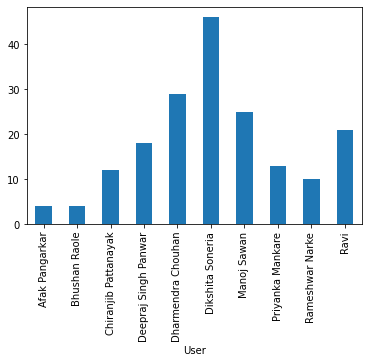

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

clockifybugsmer.groupby('User')['Duration (decimal)'].nunique().plot(kind='bar')
plt.show()



In [22]:
print(clockifybugsmer.groupby('User')['Duration (decimal)'].nunique())

User
Afak Pangarkar           4
Bhushan Raole            4
Chiranjib Pattanayak    12
Deepraj Singh Panwar    18
Dharmendra Chouhan      29
Dikshita Soneria        46
Manoj Sawan             25
Priyanka Mankare        13
Rameshwar Narke         10
Ravi                    21
Name: Duration (decimal), dtype: int64
